In [8]:
import pandas as pd
import json
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import random

## Clean dataset

In [9]:
df = pd.read_csv("updated_data.csv")

In [10]:
df.head()

,user_id,name,age,gender,target_gender,location,occupation,anxiety,avoidance,Lifestyle,Arts & Creativity,Music,Movies & Shows,Intellectual & Learning,Food & Drinks,Sports & Outdoor,Gaming & Digital,Travel & Culture,Personality & Values,Relationship Intent
0,1.0,Nethmi Bandara,37.0,Female,Male,Gampaha,Construction Worker,4.09,6.57,"[""Night Owl"", ""Meditation""]","[""Filmmaking"", ""Graphic Design"", ""Poetry"", ""In...","[""Indie""]","[""Documentaries"", ""Horror"", ""Anime"", ""Sitcoms""]","[""Self-Improvement""]","[""Street Food"", ""Spicy Food"", ""Cooking"", ""Coff...","[""Surfing"", ""Football"", ""Adventure Sports""]","[""Web3"", ""Crypto""]","[""Museums"", ""Beaches"", ""Mountains"", ""Cultural ...","[""Atheist"", ""Feminist""]","[""Open Relationship""]"
1,2.0,Malith,32.0,Male,Female,Kandy,Accountant,3.96,4.88,"[""Traveling"", ""Vegan"", ""Digital Nomad""]","[""Interior Design""]","[""Singing"", ""K-Pop"", ""Rock""]","[""Horror"", ""Documentaries"", ""K-Dramas""]","[""Science"", ""Books & Reading"", ""Self-Improveme...","[""Street Food"", ""Spicy Food"", ""Craft Beer"", ""F...","[""Cricket"", ""Swimming"", ""Hiking"", ""Surfing""]","[""Console Gaming"", ""Board Games"", ""Mobile Gami...","[""Museums"", ""Languages""]","[""Feminist"", ""Family-Oriented"", ""Career-Focuse...","[""Marriage""]"
2,3.0,Isuru,25.0,Male,Female,Gampaha,Accountant,2.63,4.24,"[""Early Bird""]","[""Poetry""]","[""Hip-Hop"", ""EDM""]","[""Sci-Fi""]","[""Technology"", ""History"", ""Science""]","[""Coffee"", ""Cooking"", ""Baking"", ""Street Food""]","[""Surfing"", ""Cycling"", ""Swimming"", ""Football""]","[""Mobile Gaming"", ""Dungeons & Dragons""]","[""Beaches""]","[""Career-Focused"", ""Family-Oriented"", ""Spiritu...","[""Long-Term Relationship""]"
3,4.0,Hashan,25.0,Male,Female,Badulla,Accountant,4.67,1.37,"[""Pet Lover"", ""Meditation"", ""Vegan""]","[""Filmmaking""]","[""Rock"", ""EDM"", ""Singing""]","[""Horror"", ""Sci-Fi""]","[""History"", ""AI & Machine Learning"", ""Technolo...","[""Street Food""]","[""Basketball"", ""Hiking"", ""Surfing"", ""Cycling""]","[""VR"", ""Console Gaming""]","[""Cultural Festivals"", ""Backpacking"", ""Road Tr...","[""Environmentalist"", ""Politically Active""]","[""Open Relationship""]"
4,5.0,Supun,23.0,Male,Female,Kandy,Doctor,3.45,1.17,"[""Traveling"", ""Pet Lover""]","[""Filmmaking"", ""Interior Design"", ""DIY & Crafts""]","[""K-Pop"", ""Pop""]","[""Thriller"", ""Sitcoms"", ""Documentaries""]","[""Self-Improvement"", ""Psychology""]","[""Wine"", ""Baking"", ""Craft Beer""]","[""Hiking"", ""Basketball"", ""Surfing"", ""Camping""]","[""Board Games"", ""Console Gaming"", ""VR""]","[""Luxury Travel"", ""Museums"", ""Road Trips""]","[""Politically Active"", ""Spiritual""]","[""Casual Dating""]"


In [11]:
df.describe()

,user_id,age,anxiety,avoidance
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,600.500000,28.810000,3.470083,3.484917
std,346.554469,6.666403,1.392839,1.363520
min,1.000000,18.000000,1.000000,1.000000
25%,300.750000,23.000000,2.507500,2.497500
50%,600.500000,29.000000,3.380000,3.485000
75%,900.250000,35.000000,4.410000,4.410000
max,1200.000000,40.000000,7.000000,7.000000


In [12]:
df.isnull().sum()

user_id                    11
name                        0
age                        11
gender                     11
target_gender              11
location                   11
occupation                 11
anxiety                    11
avoidance                  11
Lifestyle                  11
Arts & Creativity          11
Music                      11
Movies & Shows             11
Intellectual & Learning    11
Food & Drinks              11
Sports & Outdoor           11
Gaming & Digital           11
Travel & Culture           11
Personality & Values       11
Relationship Intent        11
dtype: int64

In [13]:
df = df.dropna()
df.isnull().sum()
df.drop(columns=['name'], inplace=True)

In [14]:
df.tail()

,user_id,age,gender,target_gender,location,occupation,anxiety,avoidance,Lifestyle,Arts & Creativity,Music,Movies & Shows,Intellectual & Learning,Food & Drinks,Sports & Outdoor,Gaming & Digital,Travel & Culture,Personality & Values,Relationship Intent
1195,1196.0,39.0,Male,Female,Colombo,Driver,2.37,1.84,"[""Vegan"", ""Night Owl""]","[""Writing"", ""Painting"", ""Filmmaking"", ""Interio...","[""Classical"", ""EDM"", ""Rock"", ""Pop""]","[""Horror"", ""Anime"", ""Documentaries""]","[""Psychology""]","[""Fine Dining"", ""Baking""]","[""Hiking"", ""Camping""]","[""Web3""]","[""Backpacking"", ""Cultural Festivals"", ""Road Tr...","[""Family-Oriented"", ""Spiritual"", ""Feminist"", ""...","[""Marriage""]"
1196,1197.0,27.0,Male,Female,Colombo,Doctor,1.73,4.23,"[""Vegetarian"", ""Night Owl""]","[""Interior Design"", ""Graphic Design"", ""Poetry""...","[""Playing Instruments""]","[""Romance"", ""Documentaries"", ""Sci-Fi""]","[""Psychology"", ""Books & Reading"", ""AI & Machin...","[""Street Food"", ""Baking""]","[""Cycling""]","[""Console Gaming"", ""Crypto""]","[""Languages"", ""Mountains"", ""Beaches""]","[""Atheist"", ""Spiritual"", ""Family-Oriented"", ""C...","[""Casual Dating""]"
1197,1198.0,33.0,Male,Female,Ratnapura,Doctor,4.29,2.50,"[""Early Bird"", ""Pet Lover""]","[""Poetry"", ""Painting""]","[""Singing""]","[""Sitcoms"", ""K-Dramas"", ""Romance"", ""Thriller""]","[""Philosophy""]","[""Spicy Food"", ""Cooking"", ""Fine Dining"", ""Baki...","[""Cricket"", ""Football"", ""Camping"", ""Basketball""]","[""Dungeons & Dragons"", ""eSports"", ""Board Games...","[""Mountains""]","[""Religious"", ""Family-Oriented"", ""Career-Focus...","[""Marriage""]"
1198,1199.0,32.0,Female,Male,Badulla,Business Owner,3.53,3.58,"[""Vegan"", ""Gym"", ""Vegetarian"", ""Fitness""]","[""Graphic Design"", ""Interior Design""]","[""EDM"", ""Hip-Hop"", ""Jazz""]","[""K-Dramas""]","[""Books & Reading""]","[""Fine Dining"", ""Street Food""]","[""Cricket""]","[""Mobile Gaming"", ""Board Games"", ""eSports""]","[""Museums"", ""Languages"", ""Road Trips""]","[""Family-Oriented"", ""Spiritual"", ""Career-Focus...","[""Long-Term Relationship""]"
1199,1200.0,28.0,Female,Male,Monaragala,Farmer,6.05,6.33,"[""Fitness"", ""Night Owl""]","[""Fashion""]","[""EDM"", ""Pop"", ""Playing Instruments"", ""Hip-Hop""]","[""Thriller"", ""Anime"", ""K-Dramas"", ""Documentari...","[""Self-Improvement""]","[""Baking"", ""Cooking""]","[""Adventure Sports"", ""Swimming"", ""Basketball""]","[""Dungeons & Dragons""]","[""Museums"", ""Beaches"", ""Mountains""]","[""Atheist"", ""Politically Active""]","[""Still Figuring It Out""]"


In [15]:
# We assign strict weights to the 12 categories.
# The RL Agent must learn these priorities organically through trial and error.
CATEGORY_WEIGHTS = {
    "Relationship Intent": 40.0,   # Dealbreaker
    "Personality & Values": 20.0,  # High impact on stability
    "Lifestyle": 15.0,             # Day-to-day friction
    "Intellectual & Learning": 5.0,
    "Food & Drinks": 5.0,
    "Travel & Culture": 5.0,
    "Gaming & Digital": 5.0,
    "Sports & Outdoor": 5.0,
    "Arts & Creativity": 3.0,
    "Music": 2.0,
    "Movies & Shows": 2.0
}
# Total max category points = 107.0

# --- THE MATH TRANSLATORS (Step 2) ---

def calculate_jaccard(list_a, list_b):
    """Calculates the percentage overlap between two lists of text (0.0 to 1.0)"""
    set_a, set_b = set(list_a), set(list_b)
    intersection = len(set_a.intersection(set_b))
    union = len(set_a.union(set_b))
    if union == 0:
        return 0.0
    return intersection / union

def process_pair(user_a, user_b):
    """
    Takes two raw user rows and returns:
    1. The State Tensor (What the Neural Network sees)
    2. The Reward (How we score the Neural Network's choice)
    """

    # 1. Base Logic Constraints (Hard fails)
    # If gender preferences or locations don't match, immediate negative reward.
    if user_a['target_gender'] != user_b['gender'] or user_b['target_gender'] != user_a['gender']:
        return None, -100.0 # Terrible guess by the Agent

    if user_a['location'] != user_b['location']:
        return None, -50.0  # Long distance penalty

    # 2. Calculate the 11 Category Overlaps
    category_overlaps = {}
    reward_from_interests = 0.0

    for cat, weight in CATEGORY_WEIGHTS.items():
        # Parse the JSON strings back into Python lists
        items_a = json.loads(user_a[cat])
        items_b = json.loads(user_b[cat])

        # Calculate overlap (0.0 to 1.0)
        overlap = calculate_jaccard(items_a, items_b)
        category_overlaps[cat] = overlap

        # Add to the Agent's reward
        reward_from_interests += (overlap * weight)

    # 3. Calculate Psychological Reward (The Core Logic)
    # Reward stability, penalize the Anxious-Avoidant trap
    anx_gap = abs(user_a['anxiety'] - user_b['anxiety'])
    avo_gap = abs(user_a['avoidance'] - user_b['avoidance'])
    trap_metric = (user_a['anxiety'] * user_b['avoidance']) + (user_b['anxiety'] * user_a['avoidance'])

    psych_reward = 50.0 # Base psychological score
    if trap_metric > 35: psych_reward -= 40.0 # Huge penalty for toxic trap
    if user_a['anxiety'] < 3.0 and user_b['anxiety'] < 3.0: psych_reward += 20.0 # Secure bonus

    # Final Reward Calculation
    total_reward = reward_from_interests + psych_reward

    # 4. Build the State Vector (The Neural Network Input)
    # This is a flat array of numbers representing this specific couple
    state_vector = [
        abs(user_a['age'] - user_b['age']) / 10.0, # Normalized age gap
        user_a['anxiety'] / 7.0,                   # Normalize to 0-1
        user_a['avoidance'] / 7.0,
        user_b['anxiety'] / 7.0,
        user_b['avoidance'] / 7.0,
    ]

    # Append the 11 overlap scores to the state
    for cat in CATEGORY_WEIGHTS.keys():
        state_vector.append(category_overlaps[cat])

    # state_vector is now an array of 16 numbers (5 base + 11 categories)
    return np.array(state_vector), total_reward

# --- TEST THE PIPELINE ---
print("Testing pipeline on User 0 and User 1...")
user_0 = df.iloc[0]
user_1 = df.iloc[1]

state, reward = process_pair(user_0, user_1)

if state is not None:
    print(f"State Vector (16 features): \n{state}")
    print(f"\nCalculated Reward: {reward:.2f} points")
else:
    print(f"\nCalculated Reward: {reward} points (Hard mismatch - location or gender)")

Testing pipeline on User 0 and User 1...

Calculated Reward: -50.0 points (Hard mismatch - location or gender)


In [16]:
# 1. Device Configuration (Hardware Acceleration)
# This ensures the matrix math runs on your M4's GPU (mps) instead of the CPU
device = torch.device("cpu")
print(f"Neural Network will train on: {device}")

# 2. The Neural Network Architecture (The Agent's Brain)
class MatchmakerDQN(nn.Module):
    def __init__(self, input_size=16):
        super(MatchmakerDQN, self).__init__()

        # Input Layer: 16 nodes (Our State Vector from Step 2)
        # Hidden Layer 1: Expands the data to 128 nodes to find complex patterns
        self.fc1 = nn.Linear(input_size, 128)

        # Hidden Layer 2: Compresses to 64 nodes
        self.fc2 = nn.Linear(128, 64)

        # Hidden Layer 3: Compresses to 32 nodes
        self.fc3 = nn.Linear(64, 32)

        # Output Layer: 1 node (The Predicted Reward / Q-Value)
        self.output = nn.Linear(32, 1)

        # Dropout to prevent the network from memorizing the specific 1,000 users
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # Pass the data through the layers using ReLU activation functions
        # ReLU (Rectified Linear Unit) helps the network learn non-linear relationships
        # (e.g., "High anxiety is fine ONLY IF the other person is secure")

        x = F.relu(self.fc1(x))
        x = self.dropout(x) # Randomly turn off 20% of neurons to force robust learning

        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))

        # The final output is a single number (Expected Reward)
        # No activation function here because the reward can be negative or positive
        q_value = self.output(x)

        return q_value

# 3. Initialize the Agent
agent = MatchmakerDQN().to(device)

# 4. Define how the Agent learns
# Learning Rate (lr): How big of a jump the weights make when correcting a mistake
optimizer = optim.Adam(agent.parameters(), lr=0.001)

# Loss Function: Mean Squared Error (MSE)
# It measures the difference between the Agent's predicted reward and the ACTUAL reward calculated by our rules
criterion = nn.MSELoss()

print("\nAgent initialized successfully.")
print(agent)

Neural Network will train on: cpu

Agent initialized successfully.
MatchmakerDQN(
  (fc1): Linear(in_features=16, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


Training Users: 960 | Validation Users: 241
Epoch [500/5000] | Train Loss: 45.88 | Val Loss: 75.68
Epoch [1000/5000] | Train Loss: 66.11 | Val Loss: 55.84
Epoch [1500/5000] | Train Loss: 74.48 | Val Loss: 56.85
Epoch [2000/5000] | Train Loss: 69.28 | Val Loss: 33.67
Epoch [2500/5000] | Train Loss: 71.18 | Val Loss: 64.95
Epoch [3000/5000] | Train Loss: 71.94 | Val Loss: 33.21
Epoch [3500/5000] | Train Loss: 56.30 | Val Loss: 71.50
Epoch [4000/5000] | Train Loss: 44.60 | Val Loss: 67.93
Epoch [4500/5000] | Train Loss: 56.90 | Val Loss: 46.46
Epoch [5000/5000] | Train Loss: 25.77 | Val Loss: 29.14

Cross-Validation Training Complete!


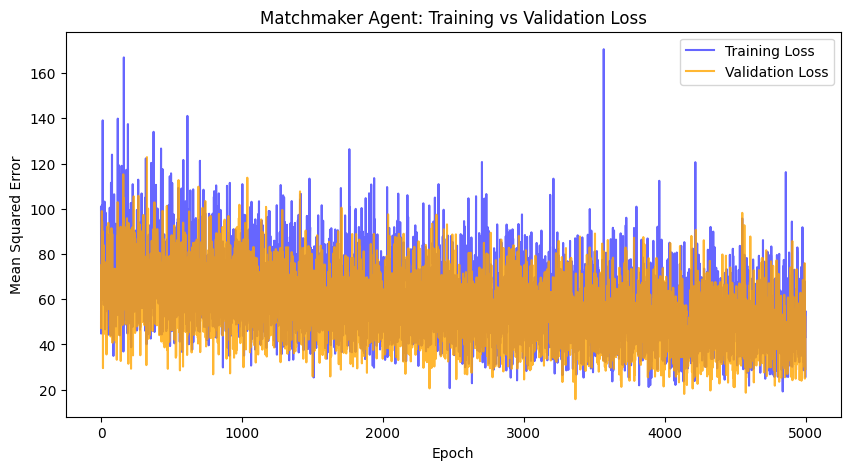

In [19]:
from sklearn.model_selection import train_test_split

# 1. Split the Users (80% Training, 20% Validation)
# We split the unique users, NOT the pairs, to ensure strict validation.
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

print(f"Training Users: {len(train_df)} | Validation Users: {len(val_df)}")

EPOCHS = 5000
BATCH_SIZE = 64

# To track both learning curves
train_loss_history = []
val_loss_history = []

for epoch in range(EPOCHS):

    # =========================================
    #  PHASE 1: TRAINING (Learning the Rules)
    # =========================================
    agent.train() # Turns ON Dropout so the network doesn't memorize users
    batch_states = []
    batch_actual_rewards = []

    while len(batch_states) < BATCH_SIZE:
        # Sample only from the TRAINING DataFrame
        idx_a, idx_b = random.sample(range(len(train_df)), 2)
        user_a = train_df.iloc[idx_a]
        user_b = train_df.iloc[idx_b]

        state, actual_reward = process_pair(user_a, user_b)

        if state is not None:
            batch_states.append(state)
            batch_actual_rewards.append([actual_reward])

    state_tensors = torch.FloatTensor(np.array(batch_states)).to(device)
    reward_tensors = torch.FloatTensor(batch_actual_rewards).to(device)

    optimizer.zero_grad()
    predicted_rewards = agent(state_tensors)
    train_loss = criterion(predicted_rewards, reward_tensors)

    # Update the weights (The actual learning)
    train_loss.backward()
    optimizer.step()

    train_loss_history.append(train_loss.item())

    # =========================================
    #  PHASE 2: VALIDATION (The Pop Quiz)
    # =========================================
    agent.eval() # Turns OFF Dropout for clean, deterministic predictions
    val_states = []
    val_actual_rewards = []

    # torch.no_grad() guarantees we DO NOT update weights during the test!
    with torch.no_grad():
        while len(val_states) < BATCH_SIZE:
            # Sample only from the unseen VALIDATION DataFrame
            idx_a, idx_b = random.sample(range(len(val_df)), 2)
            user_a = val_df.iloc[idx_a]
            user_b = val_df.iloc[idx_b]

            state, actual_reward = process_pair(user_a, user_b)

            if state is not None:
                val_states.append(state)
                val_actual_rewards.append([actual_reward])

        val_state_tensors = torch.FloatTensor(np.array(val_states)).to(device)
        val_reward_tensors = torch.FloatTensor(val_actual_rewards).to(device)

        val_predictions = agent(val_state_tensors)
        val_loss = criterion(val_predictions, val_reward_tensors)

        val_loss_history.append(val_loss.item())

    # Print progress every 500 epochs
    if (epoch + 1) % 500 == 0:
        print(f"Epoch [{epoch+1}/{EPOCHS}] | Train Loss: {train_loss.item():.2f} | Val Loss: {val_loss.item():.2f}")

print("\nCross-Validation Training Complete!")

# --- PLOT THE LEARNING CURVES ---
plt.figure(figsize=(10, 5))
plt.plot(train_loss_history, label='Training Loss', color='blue', alpha=0.6)
plt.plot(val_loss_history, label='Validation Loss', color='orange', alpha=0.8)
plt.title("Matchmaker Agent: Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

In [20]:
def find_best_matches(target_user_id, environment_df, trained_agent, top_n=5):
    """
    Takes a single user, filters the database, scores candidates using the AI,
    and returns the best matches.
    """

    # Switch the PyTorch model from 'Training' to 'Evaluation' mode
    # This turns off Dropout and optimizes for speed
    trained_agent.eval()

    # Get the target user's profile
    target_user = environment_df[environment_df['user_id'] == target_user_id].iloc[0]
    print(f"Finding matches.......")

    # STAGE 1: Candidate Generation (Database Hard Filters)
    # We drop the 1,000+ users down to a smaller pool to save computational power
    candidates = environment_df[
        (environment_df['user_id'] != target_user_id) &
        (environment_df['gender'] == target_user['target_gender']) &
        (environment_df['target_gender'] == target_user['gender']) &
        (environment_df['location'] == target_user['location']) # Must be in the same city
    ]

    print(f"Stage 1 Complete: Filtered down to {len(candidates)} viable candidates.")

    match_predictions = []

    # STAGE 2: Precision Ranking (The DRL Agent)
    # torch.no_grad() tells PyTorch NOT to calculate gradients (saves massive memory)
    with torch.no_grad():
        for index, candidate in candidates.iterrows():
            # Process the pair into the 17-feature State Tensor
            state_vector, _ = process_pair(target_user, candidate)

            if state_vector is not None:
                # Convert to Tensor and send to GPU
                state_tensor = torch.FloatTensor(state_vector).to(device)

                # The Agent predicts the Q-Value (Expected Reward)
                predicted_score = trained_agent(state_tensor).item()

                match_predictions.append({
                    'candidate_id': candidate['user_id'],
                    'occupation': candidate['occupation'],
                    'anxiety': candidate['anxiety'],
                    'avoidance': candidate['avoidance'],
                    'predicted_score': predicted_score
                })

    # Sort the results by the Agent's predicted score (Highest to Lowest)
    match_predictions.sort(key=lambda x: x['predicted_score'], reverse=True)

    return match_predictions[:top_n]


# 1. DELETE ANY EXISTING USER 9999 TO PREVENT DUPLICATES
df = df[df['user_id'] != 9999]

# 2. CREATE THE FIXED USER (Matching your database strings exactly)
test_user = {
    'user_id': 9999,
    'age': 23,
    'gender': 'Male',
    'target_gender': 'Female',
    'location': 'Galle',
    'occupation': 'Software Engineer',
    'anxiety': 1.5,
    'avoidance': 1.2,
    'Relationship Intent': json.dumps(['Long-Term Relationship']), # The Fix
    'Gaming & Digital': json.dumps(['PC Gaming', 'Game Dev']),
    'Intellectual & Learning': json.dumps(['Technology', 'Science']),
    'Personality & Values': json.dumps(['Logic-Driven', 'Honesty']),
    'Lifestyle': json.dumps(['Night Owl', 'Digital Nomad']),
    'Music': json.dumps(['EDM', 'Indie']),
    'Movies & Shows': json.dumps(['Sci-Fi']),
    'Food & Drinks': json.dumps(['Coffee Enthusiast']),
    'Sports & Outdoor': json.dumps(['Gym']),
    'Travel & Culture': json.dumps(['Backpacking']),
    'Arts & Creativity': json.dumps(['Creative Writing'])
}

# 3. INJECT THE FRESH USER
df = pd.concat([df, pd.DataFrame([test_user])], ignore_index=True)

# 4. RE-RUN THE MATCHMAKER
top_matches = find_best_matches(target_user_id=9999, environment_df=df, trained_agent=agent, top_n=5)

print("\n--- NEW TOP 5 MATCHES ---")
for i, match in enumerate(top_matches):
    print(f"#{i+1} | User {match['candidate_id']:<4} | {match['occupation']:<20} | Score: {match['predicted_score']:.2f} | Anx: {match['anxiety']:.1f}, Avo: {match['avoidance']:.1f}")

Finding matches.......
Stage 1 Complete: Filtered down to 47 viable candidates.

--- NEW TOP 5 MATCHES ---
#1 | User 864.0 | Bank Officer         | Score: 117.49 | Anx: 1.0, Avo: 4.0
#2 | User 400.0 | Business Owner       | Score: 117.22 | Anx: 1.0, Avo: 4.2
#3 | User 780.0 | Chef                 | Score: 115.33 | Anx: 1.0, Avo: 4.5
#4 | User 1179.0 | Doctor               | Score: 114.46 | Anx: 1.0, Avo: 5.8
#5 | User 86.0 | Bank Officer         | Score: 107.15 | Anx: 3.2, Avo: 4.4
